# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
#Analysis:
# Mouse weight and the average observed tumor volume for the entire Capomuline regimen are postively correlated
# The Tumor volume for Mouse y793 is decreasing substiantlly over time, which is a promising sign of improvement
# The presence of a potential outlier in Infubinol's tumor volume data at 36.321346 should be examined, as it may influence/skew the overall analysis and interpretation of treatment outcomes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame (helped by tutor)
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
#Calculate the number of unique mice
number_of_unique_mice = merged_df["Mouse ID"].nunique()
#Display number of unique mice
number_of_unique_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. (helped by tutor)
duplicate_rows_MouseID_timepoint = merged_df.loc[merged_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
# Output the array of Mouse IDs with duplicate timepoints
duplicate_rows_MouseID_timepoint

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop Duplicates (helped by tutor)
merged_df_no_duplicates = merged_df[merged_df['Mouse ID'].isin(duplicate_rows_MouseID_timepoint)==False]
# Display df
merged_df_no_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame. (helped by tutor)
number_of_mice=len(merged_df_no_duplicates['Mouse ID'].unique())
# Display number of mice in the clean DataFrame
number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped_drug_regimen_df = merged_df_no_duplicates.groupby(['Drug Regimen'])
mean_tumor_volume = grouped_drug_regimen_df["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_drug_regimen_df["Tumor Volume (mm3)"].median()
tumor_volume_variance = grouped_drug_regimen_df["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = grouped_drug_regimen_df["Tumor Volume (mm3)"].std()
tumor_volume_sem = grouped_drug_regimen_df["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
Summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                          "Median Tumor Volume": median_tumor_volume,
                    	  "Tumor Volume Variance": tumor_volume_variance,
                          "Tumor Volume Std. Dev.": tumor_volume_std_dev,
                          "Tumor Volume Std. Err.": tumor_volume_sem
                          })
# Display df
Summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = merged_df_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var','sem'])
# Rename columns
summary_df.rename(columns={'var':'variance'}, inplace=True)
# Display df
summary_df

,mean,median,std,variance,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

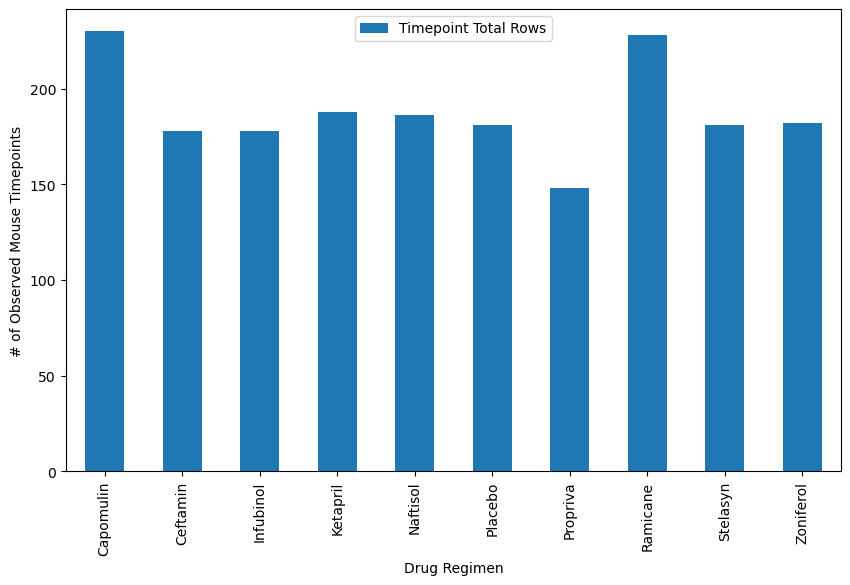

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Groupby Drug Regimen
grouped_drug_regimen_df = merged_df_no_duplicates.groupby(['Drug Regimen'])
# Calculate timepoint total rows grouped by Drug Regimen
timepoint_total_rows = grouped_drug_regimen_df['Timepoint'].count()
# Create a Dataframe with Timepoint total rows
bar_chart_df = pd.DataFrame({'Timepoint Total Rows': timepoint_total_rows
})

#Create Bar Chart using bar chart dataframe
bar_chart_df.plot(kind='bar',figsize=(10,6))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
#Display bar chart
plt.show()

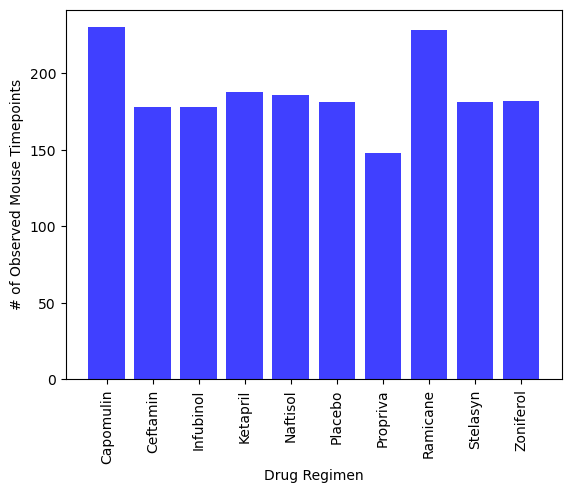

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Setting x_axis to index of bar chart dataframe(Drug Regimen)
x_axis = bar_chart_df.index
# Setting y_axis to # of Observed Mouse Timepoints in timepoint column of bar chart df
y_axis = bar_chart_df['Timepoint Total Rows']
# Create a bar chart using the x_axis and y_axis defined above
plt.bar(x_axis,y_axis,facecolor = 'blue',alpha = .75, align = 'center')
plt.xticks(rotation=90, ha='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
# Display bar chart 
plt.show()

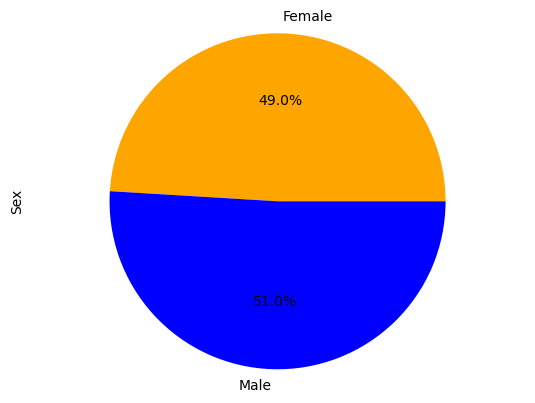

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group merged df with no duplicates by sex
grouped_gender_df = merged_df_no_duplicates.groupby(['Sex']).size()
# Set up colors for pie chart
colors = ['Orange','Blue']
# Create pie chart
gender_pie = grouped_gender_df.plot(kind='pie',y='Sex',colors=colors,autopct="%1.1f%%")
gender_pie.set_ylabel('Sex')
plt.axis('equal')
# Display df
plt.show()

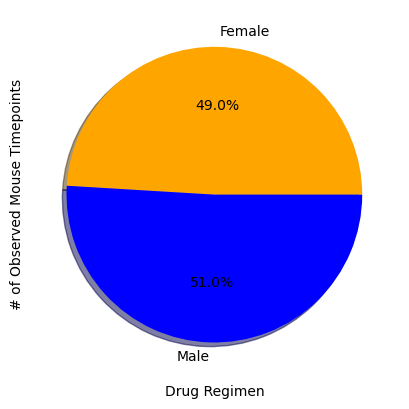

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Set labels to the index
gender = grouped_gender_df.index
# Gender count contains the counts of each gender
gender_count = grouped_gender_df
# Set colors
colors = ['Orange','Blue']
#Create a pie chart with the count of each gender
plt.pie(gender_count,labels=gender,colors=colors,shadow=True,autopct="%1.1f%%")
# Set label, rotation, and horizontal alignment
plt.xticks(rotation=90, ha='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
# Display the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = merged_df_no_duplicates.groupby(['Mouse ID'])['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(last_timepoint_df,merged_df_no_duplicates, on=['Mouse ID','Timepoint'],how='inner')
#Define the list of relevant treatment regiments
treatments_regimen=["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Filter the merged df to only include the relevant treatment regiments
final_tumor_volume_df = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'].isin(treatments_regimen)]
# Display df
final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_regimen=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Calculate Q1
Q1 = st.scoreatpercentile(final_tumor_volume_df['Tumor Volume (mm3)'],25)
# Calculate Q2
Q3 = st.scoreatpercentile(final_tumor_volume_df['Tumor Volume (mm3)'],75)
# Calculate IQR
IQR = Q3-Q1
# Calculate lower and upper bound
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

# Locate the rows which contain mice on each drug and get the tumor volumes
# Set up empty list to store the outliers
outliers = []
 
for treatment in treatments_regimen:
    # Extract tumore volume data for the relevant treatment regiment
    subset = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset to Tumor vol data
    Tumor_vol_data.append(subset)
    
    # Determine outliers using upper and lower bounds
    Q1 = st.scoreatpercentile(subset,25)
    Q3 = st.scoreatpercentile(subset,75)
    IQR = Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    #Filter for lower and upper bound in subset to determine outliers
    treatment_outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]
    # Append outliers to outliers list
    outliers.extend(treatment_outliers)
# Display outliers
outliers

[36.3213458]

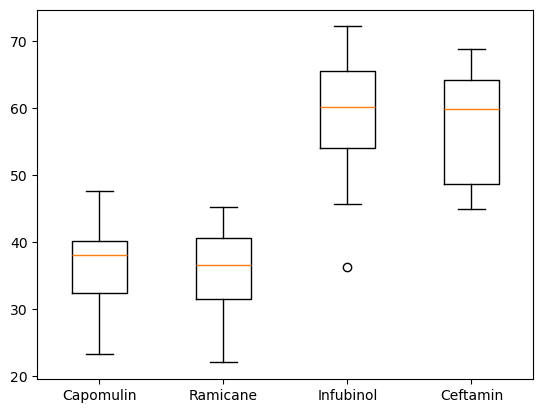

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(Tumor_vol_data, labels=treatments_regimen)
# Display boxplot
plt.show()

## Line and Scatter Plots

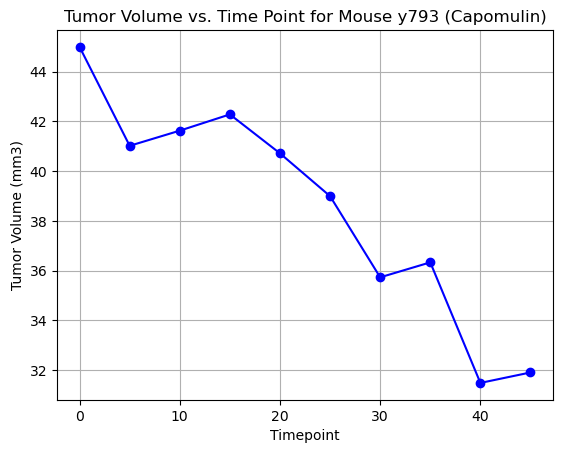

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter data for the specific mouse and Capomulin regimen
# Set Mouse id
mouse_id = 'y793'
# Filter mouse data to capomulin regimen and the mouse id value set above
mouse_data = merged_df[(merged_df['Drug Regimen'] == 'Capomulin') & (merged_df['Mouse ID'] == mouse_id)]
# Create a Scatter plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
# Set title, label, legend, and add grid
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
# Display Scatter plot
plt.show()

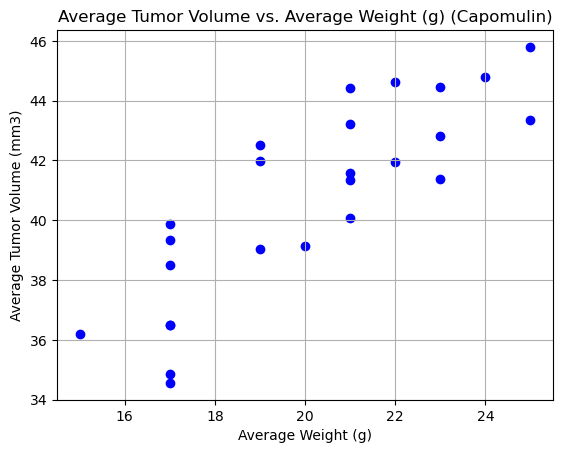

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for Capomulin regimen
capomulin_data = merged_df_no_duplicates[merged_df_no_duplicates['Drug Regimen'] == 'Capomulin']

# Group by both 'Drug Regimen' and 'Mouse ID' to calculate average weight and tumor volume per mouse
average_data = capomulin_data.groupby(['Drug Regimen', 'Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean()

# Extract weight and tumor volume data
weights = average_data['Weight (g)']
tumor_volumes = average_data['Tumor Volume (mm3)']
# Create scatter plot using weight and tumor volume data
plt.scatter(weights,tumor_volumes, marker='o', color='b')
# Set title, label, legend, and add grid
plt.title(f'Average Tumor Volume vs. Average Weight (g) (Capomulin)')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
# Display scatter plot
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694719


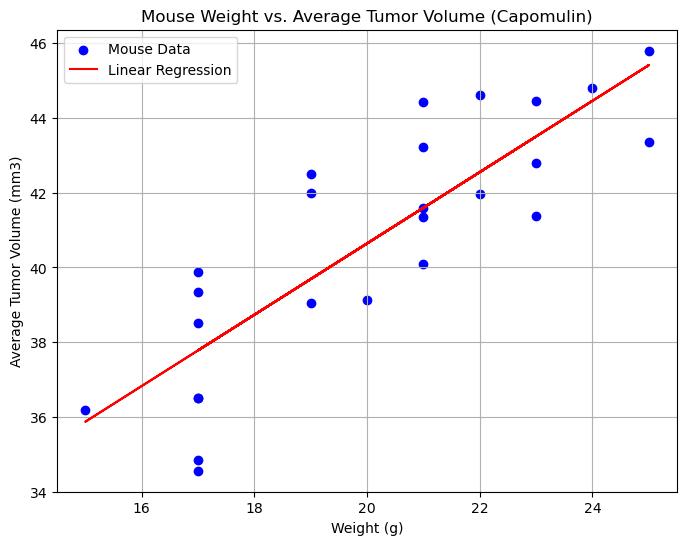

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_df_no_duplicates[merged_df_no_duplicates['Drug Regimen'] == 'Capomulin']

# Group by mouse ID to calculate average weight and average tumor volume
average_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

# Extract weight and tumor volume data
weights = average_data['Weight (g)']
tumor_volumes = average_data['Tumor Volume (mm3)']

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(weights, tumor_volumes, color='b', label='Mouse Data')

# Calculate correlation coefficient
correlation_coefficient = st.pearsonr(weights, tumor_volumes)[0]
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(weights, tumor_volumes)

# Generate predictions using the linear regression model
predicted_tumor_volumes = slope * weights + intercept

# Plot linear regression line
plt.plot(weights, predicted_tumor_volumes, color='r', label='Linear Regression')
# Set title, label, legend, and add grid
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid()
# Display scatter plot and linear regression line
plt.show()